# Supervised Learning: Classification 

In this notebook, we will train a model on the Titanic dataset to predict whether a passenger survived or not. Training a model to predict a binary outcome, instead of a continuous variable, is called classification. We will see that a lot of steps in training a classification model are similar to those in training a regression model. However, there are some differences as well. Again we will use supervised learning to train a model. This means we compare the predictions of the model to the true labels of the data to train the model. In this notebook, we will use a logistic regression model to predict whether a passenger survived or not.

To train the model we will perform the following steps:
1. Load the preprocessed data
2. Get the true labels for each example
3. Split the data into a training set and a testing set
4. Train a logistic regression model on the training set
5. Evaluate the model on the testing set using several classification metrics, like the `confusion matrix` and a `classification report`

As you can see, the steps are very similar to those in the regression notebook. The main difference is that we will use a different model and different metrics to evaluate the model.
First, we will read the data we preprocessed in the previous notebook:

In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd 

titanic_df = pd.read_csv(os.path.join(data_directory, 'titanic/train_preprocessed.csv'))
titanic_df.head()

Age      Fare  Survived  Pclass_1  Pclass_2  Pclass_3  SibSp_0  \
0 -0.565736 -0.502445         0       0.0       0.0       1.0      0.0   
1  0.663861  0.786845         1       1.0       0.0       0.0      0.0   
2 -0.258337 -0.488854         1       0.0       0.0       1.0      1.0   
3  0.433312  0.420730         1       1.0       0.0       0.0      0.0   
4  0.433312 -0.486337         0       0.0       0.0       1.0      1.0   

   SibSp_1  SibSp_2  SibSp_3  ...  Parch_4  Parch_5  Parch_6  Sex_female  \
0      1.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   
1      1.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
2      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
3      1.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
4      0.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Cabin_False  Cabin_True  
0       1.0         0.0         0.0         1.0          0.0         1.0  
1       0.0         1.0         0.0         0.0          1.0         0.0  
2       0.0         0.0         0.0         1.0          0.0         1.0  
3       0.0         0.0         0.0         1.0          1.0         0.0  
4       1.0         0.0         0.0         1.0          0.0         1.0  

[5 rows x 27 columns]

# Get the Labels 

After the loading the data, we first get the labels of the data. The labels are the target values that we want to predict. In this case, the labels show whether the passenger survived or not. We store the labels in a variable called `y_true`. This variable contains the "ground truth", or the true value, values that we want to predict. By comparing the predicted values of the model to the true values, we can evaluate the performance of the model.

In [3]:
y_true = titanic_df['Survived']
y_true

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Remove the Label Column

The second step is to remove the label column from the training data. The label column is the column that we want to predict and therefore cannot be used as a feature. If we do not remove the label column, the model will be able to perfectly predict the label, it could be as easy as returning the label column value. However, in this case, the model will not be able to generalize to new data. 

In [4]:
titanic_df = titanic_df.drop('Survived', axis=1)
titanic_df.head()

Age      Fare  Pclass_1  Pclass_2  Pclass_3  SibSp_0  SibSp_1  \
0 -0.565736 -0.502445       0.0       0.0       1.0      0.0      1.0   
1  0.663861  0.786845       1.0       0.0       0.0      0.0      1.0   
2 -0.258337 -0.488854       0.0       0.0       1.0      1.0      0.0   
3  0.433312  0.420730       1.0       0.0       0.0      0.0      1.0   
4  0.433312 -0.486337       0.0       0.0       1.0      1.0      0.0   

   SibSp_2  SibSp_3  SibSp_4  ...  Parch_4  Parch_5  Parch_6  Sex_female  \
0      0.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   
1      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
2      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
3      0.0      0.0      0.0  ...      0.0      0.0      0.0         1.0   
4      0.0      0.0      0.0  ...      0.0      0.0      0.0         0.0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  Cabin_False  Cabin_True  
0       1.0         0.0         0.0         1.0          0.0         1.0  
1       0.0         1.0         0.0         0.0          1.0         0.0  
2       0.0         0.0         0.0         1.0          0.0         1.0  
3       0.0         0.0         0.0         1.0          1.0         0.0  
4       1.0         0.0         0.0         1.0          0.0         1.0  

[5 rows x 26 columns]

## Split the Data into training and testing data

To evaluate the performance of the model, we split the data into a training set and a testing set. The training set is used to train the model and the testing set is used to evaluate the performance of the model. To split the data, we use the `train_test_split` function from the `sklearn.model_selection` module. We use 80% of the data for training and 20% of the data for testing. We do this by setting the `test_size` parameter to 0.2. We can also set the `random_state` parameter to a fixed value to ensure that the data is split in the same way every time we run the code.

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df, y_train, y_test = train_test_split(titanic_df, y_true, test_size=0.2, random_state=42)

In [6]:
train_df.shape, y_train.shape, test_df.shape, y_test.shape

((712, 26), (712,), (179, 26), (179,))

# Train the model

After we split up the dataset in a training and a test set, we can train a model. Like we said, in this notebook, we will be predicting a binary value, i.e. whether a passenger survived or not, based on a list of variables that described the characteristics of the passenger. To predict this binary value, we will use a logistic regression model. Logistic regression is a classification algorithm that predicts the probability of an example belonging to a certain class. In this case, the class is whether the passenger survived or not. The logistic regression model predicts the probability of a passenger surviving, given the input features. If the probability is greater than 0.5, the model predicts that the passenger survived. If the probability is less than 0.5, the model predicts that the passenger did not survive. As we will see, logistic regression is very similar to linear regression, but with a different function to predict the output.


Logistic regression is used for classification tasks, especially when the outcome is binary (e.g., survival or not). While it’s technically a regression model, it predicts the probability of an instance belonging to a certain class (e.g., survived = 1, did not survive = 0) rather than a continuous value. To turn a linear regression model into a logistic regression classification model, we use an so-called activation function. This is a function that takes the output of the linear regression and converts it into a probability. In logistic regression, the activation function is the logistic function (also called the sigmoid function) that maps the output of the linear regression model to a probability value between 0 and 1. 

Summarizing, we can break down the linear regression model into three main components:

1. **Equation**: Logistic regression uses the sigmoid (or logistic) function to map predicted values to a probability between 0 and 1:
    $ \rho(z) = \frac{1}{1 + e^{-z}}$
    
    where z is a linear combination of the input features, represented as: 
    
    $ z=\beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nxn$
    
    This is the same function we saw earlier in the linear regression notebook. $x_i$​ are the input features and $\beta_i$​ are the coefficients the model learns during training.
    The sigmoid function then transforms $z$ into a probability that the outcome belongs to the positive class.

2. **Decision Boundary**: To make a classification, a threshold (usually 0.5) is applied to the probability. If the probability is greater than or equal to 0.5, the instance is classified as belonging to the positive class (e.g., "survived"), and otherwise as the negative class (e.g., "did not survive").

3. **Loss Function**: Instead of minimizing the residuals like in linear regression, logistic regression minimizes log loss (or binary cross-entropy). This penalizes the model for large deviations from the correct class probabilities, helping it fit the data well without simply maximizing accuracy.

4. **Interpretation**: Each coefficient $\beta_i$​ represents the log-odds of the outcome. A positive coefficient means that as the feature increases, the probability of the positive class increases, and vice versa.

5. **Evaluation**: Performance can be measured with classification metrics like accuracy, precision, recall, F1 score, giving insights into the model’s predictive power.

To train (or fit) a logistic regression model, we can use the `LogisticRegression` class from the `sklearn.linear_model` module, that also contained the `LinearRegression` class that we used before. In this case, we create an instance of the `LogisticRegression` class and call the `fit` method on the training data to train the model. The `fit` method adjusts the coefficients of the logistic regression model to make better predictions. It does this iteratively, by comparing the predicted values to the actual values and adjusting the coefficients to minimize the error.

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_df, y_train)

LogisticRegression()

# Evaluation

So far, the code of this notebook has been very similar to the code from the regression notebook. The two main differences are we are using a different dataset and a different model.
The model we have been using is the `LogisticRegression` model from the `sklearn.linear_model` module to train a binary classification model. The evaluation of these types of models, however, is where thing starts to differ. In regression, we used metrics like the mean squared error to evaluate the model. In classification, we use different metrics to evaluate the model. 

One of the main evaluation methods we use is a `confusion matrix`. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. A confusion matrix is created by comparing the predicted class labels with the ground-truth/actual labels in **Y_test**. Using a `confusion matrix`, we can see how well the algorithm performs on the classification task. By comparing the predicted with the actual labels we can create a table like the one below:
 
| Actual/Predicted | Predicted Negative  | Predicted Positive  |
| ---------------- | ------------------- | ------------------- |
| Actual Negative  | True Negatives (TN) | False Positives (FP)|
| Actual Positive  | False Negatives (FN)| True Positives (TP) |


As you can see, in every cell, we compare the actual label with the predicted label. For the cases that were predicted negative, we check how many of them were actual negative (the true negatives) and how many should have been actually positive (the false negatives). Likewise, for the predictive positives, we check how many of them should be actually positive (the true positives) and how many should have actually been classified negative (the false positives). Below we calculate the confusion matrix for the logistic regression model using the `confusion_matrix` function in the `sklearn.metrics` module. 

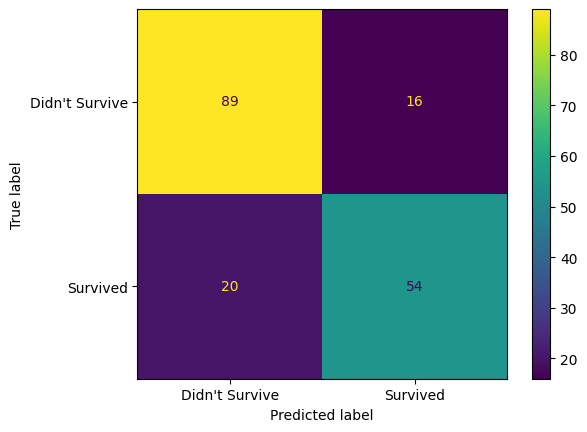

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(test_df)

cf = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cf, display_labels=["Didn't Survive", "Survived"]).plot()

Here we can see that the confusion matrix is a 2x2 matrix. The rows represent the actual labels, and the columns represent the predicted labels. The confusion matrix shows that the model made 89 correct predictions for the passengers that did not survive (true negatives) and 54 correct predictions for the passengers that did survive (true positives). The model also made 16 incorrect predictions for the passengers that did not survive (false positives) and 20 incorrect predictions for the passengers that did survive (false negatives).

Based on the confusion matrix, we can calculate several classification metrics to evaluate the performance of the model. Some of the most common metrics are:
- **Accuracy**: The proportion of correct predictions to the total number of predictions.
- **Precision**: The proportion of true positive predictions to the total number of positive predictions.
- **Recall**: The proportion of true positive predictions to the total number of actual positive examples.
- **F1 Score**: The harmonic mean of precision and recall.

Each of these metrics provides a different perspective on the performance of the model. For example, accuracy tells us how many predictions the model got right, while precision tells us how many of the positive predictions were correct. 

There are many more metrics that can be based on the confusion matrix, see for example the table "Terminology and derivations from a confusion matrix" at https://en.wikipedia.org/wiki/Precision_and_recall. The metrics above are however the ones that you come across most often. That's why we limit our discussion here to these metrics. We will now discuss the above metrics for the logistic regression model one by one. We start with the accuracy.

## Accuracy

The accuracy, can be calculated from the confusion matrix as follows:


$accuracy = \dfrac{TP+TN}{TP+TN+FP+FN}$

Hence, the accuracy is the number of correctly made predictions divided by the total number of cases in the test set. The accuracy ranges from 0 to 1 with 0 being the worst performance, and 1 being a perfect performance. The accuracy can be calculate by using the sklearn **accuracy_score** function.

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7988826815642458

We can see that the `LogisticRegression` model has a (rounded) accuracy of 0.80. This means that the model correctly predicted the survival of 80% of the passengers in the test set.
Next, we will discuss the precision of the model.

## Precision

The precision can be defined as follows:

$precision = \dfrac{TP}{TP + FP}$

It divides the true positives by the number of cases that have been predicted positive by the model (TP + FP). The precision also ranges from 0 to 1, with 0 being the worst and 1 being the best performance. Hence, it calculates the ratio of the predicted positives that are actually correct. 

In [12]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7714285714285715

The precision of the `LogisticRegression` model is 0.77. This means that 77% of the passengers that the model predicted to have survived, actually did survive. Next, we will discuss the recall of the model.

## Recall

The recall or true positive rate can be defined as follows:

$recall = \dfrac{TP}{TP+FN}$

It divides the true positives by the number of cases that are in truth positive (TP+FN) and that should actually have been labelled positive by the model. As such, the recall can be used to give us an idea of how many positives out of the total population of positives we were actually able to identify. In the case below, we were able to predict 91% of all positives correctly.

In [13]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7297297297297297

The recall of the `LogisticRegression` model is 0.73. This means that the model correctly predicted the survival of 73% of the passengers that actually survived. Next, we will discuss the F1 score of the model.

## F1 Score

The F1 score is the harmonic mean of precision and recall. The F1 is defined as follows:

$F1 = 2 * \dfrac{precision * recall}{precision + recall}$

The F1 score is typically used if you seek to balance recall and precision. In addition, the F1 score is a suitable measure if you are dealing with an uneven class distribution. For instance, if the number of actual negatives is large.

In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.75

The F1 score of the `LogisticRegression` model is 0.75. This means that the model has a good balance between precision and recall.

## Classification Report

Instead of using the separate functions above to calculate precision, recall and f1-score, we can use the handy **classification_report** function to calculate these performance metrics for each of the classification categories at once. The classification report is a table that shows the precision, recall, and F1 score for each class in the dataset. In this case, the classification report shows the precision, recall, and F1 score for the passengers that did not survive (class 0) and the passengers that did survive (class 1). The classification report also shows the support for each class, which is the number of examples in the test set that belong to each class.

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Didn't Survive", "Survived"]))

                precision    recall  f1-score   support

Didn't Survive       0.82      0.85      0.83       105
      Survived       0.77      0.73      0.75        74

      accuracy                           0.80       179
     macro avg       0.79      0.79      0.79       179
  weighted avg       0.80      0.80      0.80       179



As we can see the classification report also provides averages of the precision, recall, and f1-score. There are two types of averages, the `macro` average and the `weighted` average. The `macro` average calculates the average of the precision, recall, and F1 score for each class. The `weighted` average calculates the average of the precision, recall, and F1 score for each class, weighted by the number of examples in each class. In this case, the `macro` average is 0.79 for all metrics and the `weighted` average is 0.80. This means that the model has a good balance between precision, recall, and F1 score for both classes.

Last, we will discuss two graphical ways to evaluate the model, the ROC curve and the Precision-Recall curve. These plots show how well the model performs for different thresholds. Remember, the `LogisticRegression` model predicts a probability value between 0 and 1. To make a prediction, the model uses a threshold value to determine whether the predicted probability is greater than or equal to the threshold. The threshold we have used so far was 0.5. But by changing the threshold value, we can change the number of true positives, false positives, true negatives, and false negatives. The ROC curve and the Precision-Recall curve show how the model performs for different threshold values. The ROC curve shows the true positive rate (recall) against the false positive rate for different thresholds. The Precision-Recall curve shows the precision against the recall for different thresholds. 

## ROC Curve

To plot the ROC curve and the Precision-Recall curve, we need use the model to predict the probabilities, instead of the labels we used earlier. We can do this by using the `predict_proba` method of the `LogisticRegression` model. The `predict_proba` method returns the probability of each class for each example. In this case, the `predict_proba` method returns the probability of the passenger not surviving (class 0) and the probability of the passenger surviving (class 1). 

In [16]:
y_pred_prob = model.predict_proba(test_df)
y_pred_prob.shape

(179, 2)

After calculating the probabilities, we can use the `roc_curve` function from the `sklearn.metrics` module to calculate the true positive rate and the false positive rate for different threshold values. We will use these values to plot the ROC curve. 

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])

The ROC curve shows the true positive rate against the false positive rate for different threshold values. The ROC curve shows the trade-off between the true positive rate and the false positive rate for different threshold values. The closer the curve is to the top-left corner, the better the model performs. We will plot the ROC curve for the `LogisticRegression` model using the `roc_curve` function from the `sklearn.metrics` module.

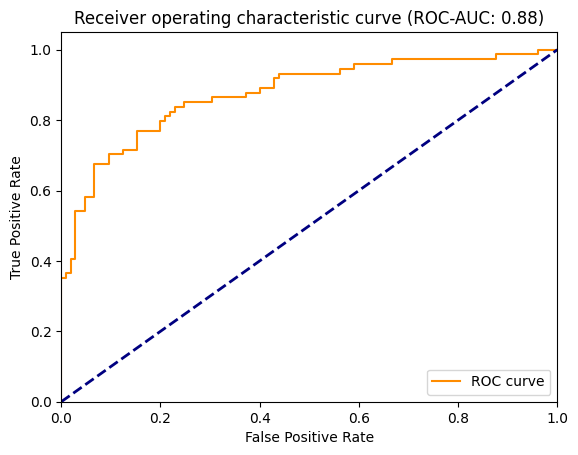

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic curve (ROC-AUC: {roc_auc:.2f})')
plt.legend(loc="lower right")

The blue line in the graph shows the ROC curve for a completely random model. The orange line shows the ROC curve for the `LogisticRegression` model. We can see the model already performs a lot better than the random model, but still can improve. One way of measuring the model performance in terms of the ROC curve is the area under the ROC curve (AUC). The AUC ranges from 0 to 1, with 0.5 being the performance of a random model and 1 being a perfect model. The AUC of the `LogisticRegression` model is 0.88. This means that the model performs well for different threshold values. An alternative way of plotting the ROC curve would be to use the `RocCurveDisplay` class from the `sklearn.metrics` module. 

## Precision-Recall Curve

The Precision-Recall curve shows the precision against the recall for different threshold values. The Precision-Recall curve shows the trade-off between the precision and the recall for different threshold values. The closer the curve is to the top-right corner, the better the model performs. We will plot the Precision-Recall curve for the `LogisticRegression` model using the `PrecisionRecallDisplay` function from the `sklearn.metrics` module.

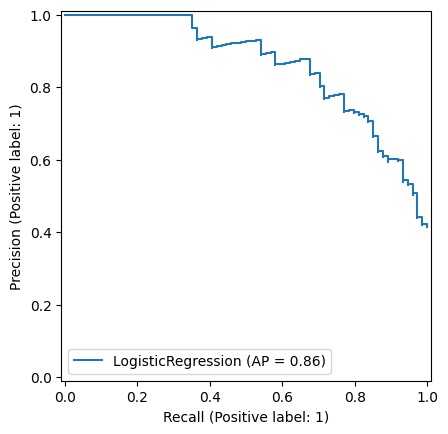

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(
   model, test_df, y_test)

We see that the precision-recall curve for the `LogisticRegression` model is quite good. The curve is close to the top-right corner, which means that the model has a good balance between precision and recall for different threshold values. The average precision value is 0.86 so also quit good. This means that the model performs well for different threshold values.

## Conclusion

In this notebook, we trained a logistic regression model to predict whether a passenger survived or not. We followed a similar procedure to training a regression model earlier:
1. We loaded the preprocessed data
2. We got the true labels for each example
3. We split the data into a training set and a testing set
4. We trained a logistic regression model on the training set
5. We evaluated the model on the testing set 

Especially, the last step was quite different for the classification models. The performance metrics to use for a classification model are quite different. Most model metrics are based off the confusion matrix, so we started with that. After that, we evaluated the model with several classification metrics, like accuracy, precision, recall, and F1 score. Finally, we plotted the ROC curve and the Precision-Recall curve to evaluate the model for different threshold values.

The model already had a good performance, but there are still ways to improve the model. In the next exercise, we will provide some ways to improve the model and you will try to optimize the model even further.